## Logistic Regression

Breast Cancer data from [the UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) contains records corresponding to 
cases of observed tumors.   There are a number of observations for each and a categorisation in the `class` column: 2 for benign (good), 4 for malignant (bad).  Your task is to build a logistic regression model to classify these cases. 

The data is provided as a CSV file.  There are a small number of cases where no value is available, these are indicated in the data with `?`. I have used the `na_values` keyword for `read_csv` to have these interpreted as `NaN` (Not a Number).  Your first task is to decide what to do with these rows. You could just drop these rows or you could [impute them from the other data](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).

You then need to follow the procedure outlined in the lecture for generating a train/test set, building and evaluating a model. Your goal is to build the best model possible over this data.   Your first step should be to build a logistic regression model using all of the features that are available.
  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import RFE

In [2]:
bcancer = pd.read_csv("files/breast-cancer-wisconsin.csv", na_values="?")
bcancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [3]:
# Examine the data, look at the statistical summary etc.
bcancer.describe()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
# printing the no. of rows and rows
bcancer.shape

(699, 11)

In [5]:
# printing the columns
bcancer.columns

Index(['sample_code_number', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [6]:
# figuring out the NaN values in the data
bcancer.isnull().sum()

sample_code_number              0
clump_thickness                 0
uniformity_cell_size            0
uniformity_cell_shape           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

In [7]:
# replcing the nan with median value
import statistics
x = statistics.median(bcancer['bare_nuclei'])
bcancer['bare_nuclei'] = bcancer['bare_nuclei'].replace({np.nan: x})
bcancer.isnull().sum()

sample_code_number             0
clump_thickness                0
uniformity_cell_size           0
uniformity_cell_shape          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

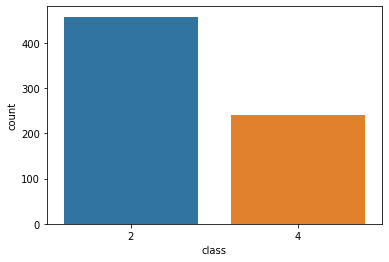

In [8]:
sns.countplot(bcancer['class'])

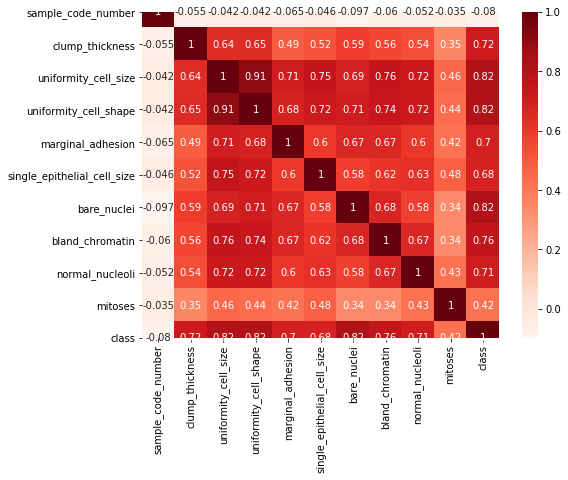

In [9]:
plt.figure(figsize=(8,6))
cor = bcancer.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
X = bcancer.drop(['class', 'sample_code_number'], axis=1)
y = bcancer['class']

In [11]:
# Build your first model - defining training and test data sets then use Logistic Regression to build a model
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train shape:  (524, 9)
y_train shape:  (524,)
X_test shape:  (175, 9)
y_test.shape:  (175,)


In [12]:
# using Logistic Regression to build a model
# training model
lr = LogisticRegression().fit(X_train, y_train)

C:\Users\Harshitha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Evaluation

To evaluate a classification model we want to look at how many cases were correctly classified and how many
were in error.  In this case we have two outcomes - benign and malignant.   SKlearn has some useful tools, the 
[accuracy_score]() function gives a score from 0-1 for the proportion correct.  The 
[confusion_matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) function 
shows how many were classified correctly and what errors were made.  Use these to summarise the performance of 
your model (these functions have already been imported above).

In [13]:
# Evaluating the model
# making predictions on training and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calculating accuracy score on training set
print("Accuracy percent on training set: ", accuracy_score(y_train, y_pred_train)*100)

# calculating accuracy score on test set
print("Accuracy percent on test set: ", accuracy_score(y_test, y_pred_test)*100)

Accuracy percent on training set:  96.94656488549617
Accuracy percent on test set:  94.28571428571428


In [14]:
#report
class_report = classification_report(y_test, y_pred_test)
class_report

'              precision    recall  f1-score   support\n\n           2       0.96      0.96      0.96       114\n           4       0.92      0.92      0.92        61\n\n    accuracy                           0.94       175\n   macro avg       0.94      0.94      0.94       175\nweighted avg       0.94      0.94      0.94       175\n'

In [15]:
#confusion matrix
confusion_matrix(y_train, y_pred_train)

array([[337,   7],
       [  9, 171]], dtype=int64)

In [16]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
tn, fp, fn, tp

(337, 7, 9, 171)

In [17]:
#confusion matrix
confusion_matrix(y_test, y_pred_test)

array([[109,   5],
       [  5,  56]], dtype=int64)

In [18]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
tn, fp, fn, tp

(109, 5, 5, 56)

### Checkpoint

The checkpoint for this week workshop is to report accuracy on training and test set. Also, provide the confusion matrix to check for which class model is doing good and where error were are made. Based on these results, provide explaination about:
- Can we deploy this trained model in hospital's settings?
- Is model overfitting?
- For which class model is making error? Read about False Positive Rate (FPR) and False Negative Rate (FNR)

**On iLearn under Practical Week 6, make your submission in the form of results and their interpretation (1 paragraph) to get mark for this week checkpoint.**

1. Accuracy score on training set:  0.9694656488549617
2. Accuracy score on test set:  0.9428571428571428
3. We can deploy this model in hospital's settings because the accuracy score is         
    good.
4. Model is overfitting.
5. There is an error in both classes but very little. In training set for class 4 is making more error compared to class 2.\
Confusion matrix: [TN,FP,FN,TP]\
Confusion matrix for training set: [337,7,9,171] \
Confusing matrix for test set: [109,5,5,56]\
I had replaced the NaN with the median value. Confusion matrix helps to find the accuracy score and can be calculated as sum of diagonal elements in the matrix divided by the sum of all elements. When a model is overfitted, if it performs well on the training set but generalizes poorly on the test sets. When a model performs poorly on the training set then it is under fitted.\
Accuracy = (TP+TN)/(TP+TN+FP+FN)  
False Positive Rate = FP/(FP+TN)\
False Negative Rate = FN/(FN+TP)


### Feature Selection

Since you have many features available, one part of building the best model will be to select which features to use as input to the classifier. Your initial model used all of the features but it is possible that a better model can 
be built by leaving some of them out.   Test this by building a few models with subsets of the features - how do your models perform? 

This process can be automated.  The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features.  Use RFE to select features for a model with 3, 4 and 5 features - can you build a model that is as good or better than your initial model?

In [19]:
rfe = RFE(lr, 5)
rfe_model = rfe.fit(X_train, y_train)
print("No. of features: ", rfe_model.n_features_)
print("Selected features: ", rfe_model.support_)
print("Features ranking: ", rfe_model.ranking_)

No. of features:  5
Selected features:  [ True  True  True False False  True False  True False]
Features ranking:  [1 1 1 4 5 1 2 1 3]


C:\Users\Harshitha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harshitha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harshitha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harshitha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harshitha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

In [20]:
temp = pd.Series(rfe_model.support_, index = X_train.columns)
temp

clump_thickness                 True
uniformity_cell_size            True
uniformity_cell_shape           True
marginal_adhesion              False
single_epithelial_cell_size    False
bare_nuclei                     True
bland_chromatin                False
normal_nucleoli                 True
mitoses                        False
dtype: bool

In [21]:
selected_features_rfe = temp[temp==True].index
selected_features_rfe

Index(['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape',
       'bare_nuclei', 'normal_nucleoli'],
      dtype='object')

In [22]:
# splitting into train and test
train, test = train_test_split(bcancer,random_state = 7)
print(train.shape)
print(test.shape)

(524, 11)
(175, 11)


In [23]:
# choosing the selected features
X_train = train[selected_features_rfe]
y_train = train['class']
X_test = test[selected_features_rfe]
y_test = test['class']
# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train shape:  (524, 5)
y_train shape:  (524,)
X_test shape:  (175, 5)
y_test.shape:  (175,)


In [24]:
# using Logistic Regression to build a model
# training model
lr = LogisticRegression().fit(X_train, y_train)

C:\Users\Harshitha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
# Evaluating the model
from sklearn.metrics import accuracy_score

# making predictions on training and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calculating accuracy score on training set
print("Accuracy percent on training set: ", accuracy_score(y_train, y_pred_train)*100)

# calculating accuracy score on test set
print("Accuracy percent on test set: ", accuracy_score(y_test, y_pred_test)*100)

Accuracy percent on training set:  96.94656488549617
Accuracy percent on test set:  94.85714285714286


When we use 5 selected features the model is getting better than 3 or 4 features.

## Conclusion

Write a brief conclusion to your experiment.  You might comment on the proportion of __false positive__ and __false negative__ classifications your model makes.  How useful would this model be in a clinical diagnostic setting? 

It is useful in clinical diagnostic settin to predict.